In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [46]:
df = pd.read_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBStats_all.csv')
df

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.0,6.2,0,0,20,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.0,7.8,2,1,35t,0.0,0.0,98.1,20,home,1996
2,Paul JustinP. Justin,8,5,53.0,6.6,0,0,30,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ. George,35,16,215.0,6.1,0,0,55,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK. Collins,31,17,198.0,6.4,2,0,30,4.0,12.0,95.9,29,home,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,Alex SmithA. Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP. Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR. Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT. Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016


In [47]:
df.describe()

,att,cmp,yds,ypa,td,sack,loss,rate,game_points,year
count,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13171.000000,13171.000000,13171.000000,13188.000000,13188.000000
mean,26.870488,16.121777,186.135118,6.882909,1.118138,1.863108,11.971225,80.242571,21.379436,2005.898923
std,13.583991,8.774988,105.629874,4.226307,1.119667,1.701091,11.970053,32.068021,10.663992,6.012892
min,0.000000,-6.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,20.000000,11.000000,115.000000,5.200000,0.000000,0.000000,0.000000,58.600000,13.000000,2001.000000
50%,29.000000,17.000000,197.000000,6.700000,1.000000,2.000000,9.000000,80.900000,21.000000,2006.000000
75%,36.000000,22.000000,260.000000,8.100000,2.000000,3.000000,18.000000,102.000000,28.000000,2011.000000
max,69.000000,58.000000,527.000000,81.000000,7.000000,12.000000,91.000000,158.300000,62.000000,2016.000000


In [48]:
df = df[df.year>2003]
df
#I deleted all the data from 1996 to 2003 to see the data from 2004

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
5097,Peyton ManningP. Manning,29,16,256.0,8.8,2,1,64,1.0,12.0,93.5,24,away,2004
5098,Tom BradyT. Brady,38,26,335.0,8.8,3,1,29,2.0,15.0,111.2,27,home,2004
5099,Matt HasselbeckM. Hasselbeck,29,19,246.0,8.5,1,1,38,0.0,0.0,89.2,21,away,2004
5100,Aaron BrooksA. Brooks,37,18,223.0,6.0,1,1,33,2.0,16.0,65.5,7,home,2004
5101,Carson PalmerC. Palmer,27,18,248.0,9.2,2,1,53t,1.0,10.0,105.2,24,away,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,Alex SmithA. Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP. Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR. Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT. Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016


In [5]:
df.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBstat_from_2004.csv',index = None)
#saved new data frame into new csv file

In [49]:
df = df.drop('lg', axis = 1)
df = df.drop('game_points', axis = 1)
df = df.drop('home_away', axis = 1)
df = df.drop('int', axis = 1)
df.columns

Index(['qb', 'att', 'cmp', 'yds', 'ypa', 'td', 'sack', 'loss', 'rate', 'year'], dtype='object')

In [6]:
d = {'att':'Total_att','cmp':'Total_cmp','yds':'Total_yds','ypa':'AVG_ypa','sack':'Total_sack','td':'Total_td','rate':'AVG_rate'}
df1=df.groupby('qb').agg({'att':'sum','cmp':'sum','yds':'sum','ypa':'mean','sack':'sum','td':'sum','rate':'mean'}).rename(columns=d)
df1
#calculated whole stats of each Quarterbacks and made the average of yard per attempt(ypa) and passer rate(rate)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate
qb,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000
...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000


In [9]:
df = df.drop('qb', axis = 1)
df
#for the analysis, there will be 2 dataset will be used, df = single game statistic of quarterback
#df1 total game stats of each quarterbacks

,att,cmp,yds,ypa,td,sack,loss,rate,year
5097,29,16,256.0,8.8,2,1.0,12.0,93.5,2004
5098,38,26,335.0,8.8,3,2.0,15.0,111.2,2004
5099,29,19,246.0,8.5,1,0.0,0.0,89.2,2004
5100,37,18,223.0,6.0,1,2.0,16.0,65.5,2004
5101,27,18,248.0,9.2,2,1.0,10.0,105.2,2004
...,...,...,...,...,...,...,...,...,...
13183,28,21,264.0,9.4,2,1.0,2.0,112.8,2016
13184,38,22,269.0,7.1,2,0.0,0.0,75.4,2016
13185,32,19,258.0,8.1,1,1.0,6.0,95.6,2016
13186,6,4,42.0,7.0,0,1.0,5.0,86.8,2016


In [7]:
df1["QB_pass_cmp_rate"] = (
    df1["Total_cmp"] / df1["Total_att"] 
) * 100
df1

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,55.387205
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,66.386555
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,56.566524
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,100.000000
...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862,58.376289
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000,NaN
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000,0.000000


In [8]:
df1['qb'] = df1.index

In [10]:
df1 = df1.fillna(0)
df1

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,55.387205,A.J. FeeleyA. Feeley
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,66.386555,A.J. McCarronA. McCarron
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,56.566524,Aaron BrooksA. Brooks
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,100.000000,Ace SandersA. Sanders
...,...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862,58.376289,Vinny TestaverdeV. Testaverde
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000,0.000000,Wali LundyW. Lundy
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000,0.000000,Willie ParkerW. Parker


In [11]:
df1.isnull().sum()

Total_att           0
Total_cmp           0
Total_yds           0
AVG_ypa             0
Total_sack          0
Total_td            0
AVG_rate            0
QB_pass_cmp_rate    0
qb                  0
dtype: int64

In [12]:
df2 = df1.sort_values(by=['Total_yds'], ascending=False).head(25)
df2
#for the analysis of Total passing yards, data is sorted in the order of Total yds

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702,Eli ManningE. Manning
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113,Carson PalmerC. Palmer
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910,Matt RyanM. Ryan
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers


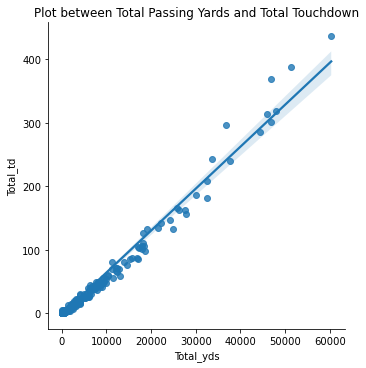

In [13]:
ax = sns.lmplot(x = "Total_yds", y= "Total_td", data = df1)
plt.title("Plot between Total Passing Yards and Total Touchdown")
ax

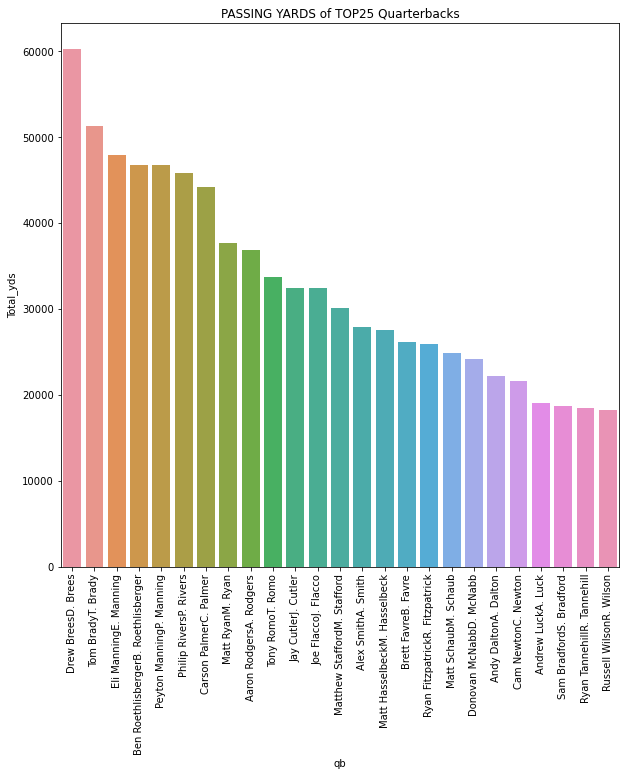

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='Total_yds', data=df2) 
plt.title("PASSING YARDS of TOP25 Quarterbacks") #title
plt.xticks(rotation=90)
plt.show()

In [25]:
df2 = df1.sort_values(by=['Total_td'], ascending=False).head(25)
df2

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702,Eli ManningE. Manning
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113,Carson PalmerC. Palmer
Tony RomoT. Romo,4244,2777,33695.0,8.088976,246.0,243,99.261417,65.433553,Tony RomoT. Romo


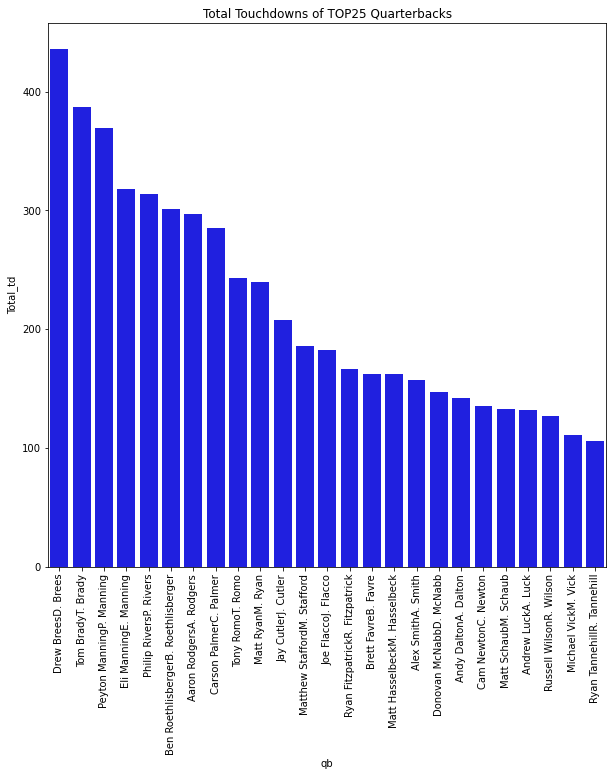

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='Total_td', data=df2, color = 'blue') 
plt.title("Total Touchdowns of TOP25 Quarterbacks") #title
plt.xticks(rotation=90)
plt.show()

In [20]:
df2 =df2.sort_values(by=['QB_pass_cmp_rate'], ascending=[False]).head(25)
df2

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Tony RomoT. Romo,4244,2777,33695.0,8.088976,246.0,243,99.261417,65.433553,Tony RomoT. Romo
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910,Matt RyanM. Ryan
Russell WilsonR. Wilson,2281,1476,18193.0,8.146250,205.0,127,99.928750,64.708461,Russell WilsonR. Wilson
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger


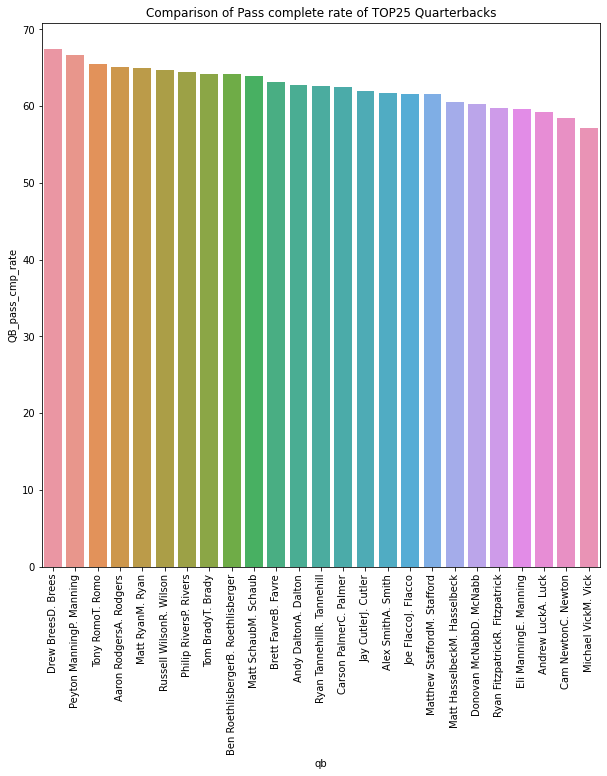

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='QB_pass_cmp_rate', data=df2) 
plt.title("Comparison of Pass complete rate of TOP25 Quarterbacks")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

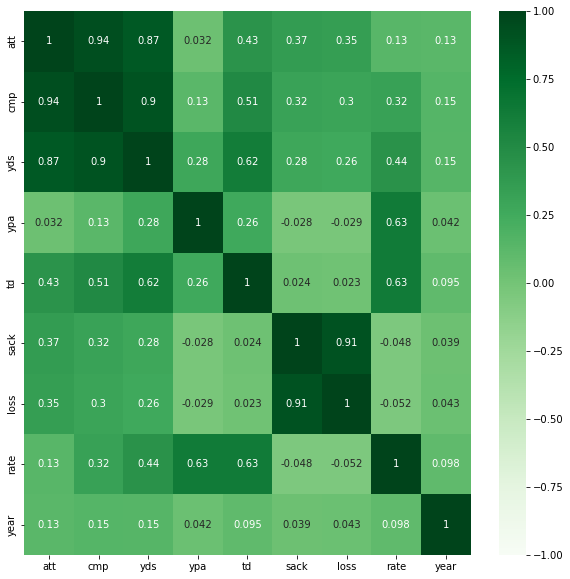

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

# Unsupervised Method

In [50]:
df = df.drop('qb', axis = 1)
df.columns

Index(['att', 'cmp', 'yds', 'ypa', 'td', 'sack', 'loss', 'rate', 'year'], dtype='object')

In [51]:
df

,att,cmp,yds,ypa,td,sack,loss,rate,year
5097,29,16,256.0,8.8,2,1.0,12.0,93.5,2004
5098,38,26,335.0,8.8,3,2.0,15.0,111.2,2004
5099,29,19,246.0,8.5,1,0.0,0.0,89.2,2004
5100,37,18,223.0,6.0,1,2.0,16.0,65.5,2004
5101,27,18,248.0,9.2,2,1.0,10.0,105.2,2004
...,...,...,...,...,...,...,...,...,...
13183,28,21,264.0,9.4,2,1.0,2.0,112.8,2016
13184,38,22,269.0,7.1,2,0.0,0.0,75.4,2016
13185,32,19,258.0,8.1,1,1.0,6.0,95.6,2016
13186,6,4,42.0,7.0,0,1.0,5.0,86.8,2016


In [52]:
df.isnull().sum()

att      0
cmp      0
yds      0
ypa      0
td       0
sack    17
loss    17
rate    17
year     0
dtype: int64

In [53]:
df = df.fillna(0)
df

,att,cmp,yds,ypa,td,sack,loss,rate,year
5097,29,16,256.0,8.8,2,1.0,12.0,93.5,2004
5098,38,26,335.0,8.8,3,2.0,15.0,111.2,2004
5099,29,19,246.0,8.5,1,0.0,0.0,89.2,2004
5100,37,18,223.0,6.0,1,2.0,16.0,65.5,2004
5101,27,18,248.0,9.2,2,1.0,10.0,105.2,2004
...,...,...,...,...,...,...,...,...,...
13183,28,21,264.0,9.4,2,1.0,2.0,112.8,2016
13184,38,22,269.0,7.1,2,0.0,0.0,75.4,2016
13185,32,19,258.0,8.1,1,1.0,6.0,95.6,2016
13186,6,4,42.0,7.0,0,1.0,5.0,86.8,2016


In [43]:
df.isnull().sum()

att     0
cmp     0
yds     0
ypa     0
td      0
sack    0
loss    0
rate    0
year    0
dtype: int64

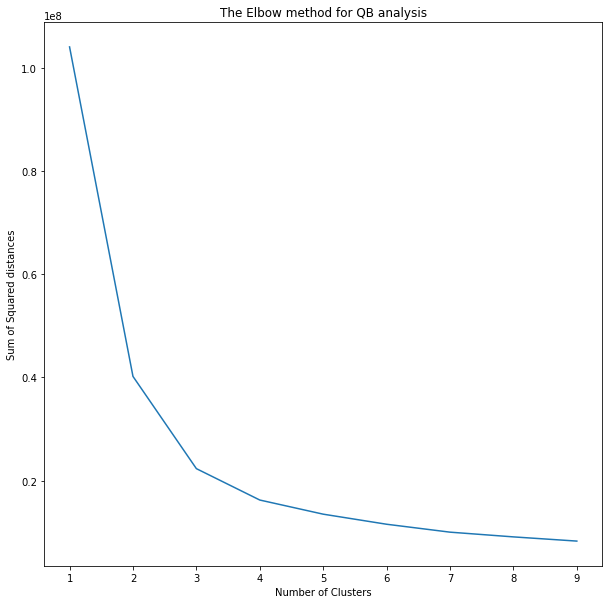

In [44]:
wss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wss)
plt.title('The Elbow method for QB analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared distances')
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['att']= le.fit_transform(df['att']) 
df['cmp']= le.fit_transform(df['cmp']) 
df['yds']= le.fit_transform(df['yds']) 
df['ypa']= le.fit_transform(df['ypa']) 
df['sack']= le.fit_transform(df['sack']) 
df['rate']= le.fit_transform(df['rate']) 
df['year']= le.fit_transform(df['year']) 

df.head(6)

,att,cmp,yds,ypa,td,sack,loss,rate,year
5097,29,18,275,96,2,1,12.0,757,0
5098,38,28,354,96,3,2,15.0,933,0
5099,29,21,265,93,1,0,0.0,714,0
5100,37,20,242,68,1,2,16.0,477,0
5101,27,20,267,100,2,1,10.0,874,0
5102,27,22,243,91,2,1,5.0,1050,0


In [46]:
x_train = df.drop("td", axis=1)
x_train

,att,cmp,yds,ypa,sack,loss,rate,year
5097,29,18,275,96,1,12.0,757,0
5098,38,28,354,96,2,15.0,933,0
5099,29,21,265,93,0,0.0,714,0
5100,37,20,242,68,2,16.0,477,0
5101,27,20,267,100,1,10.0,874,0
...,...,...,...,...,...,...,...,...
13183,28,23,283,102,1,2.0,949,12
13184,38,24,288,79,0,0.0,576,12
13185,32,21,277,89,1,6.0,778,12
13186,6,6,61,78,1,5.0,690,12


In [47]:
df_train = df.loc[:,"td"].values
df_train

array([2, 3, 1, ..., 1, 0, 1])

In [48]:
n_samples, n_features = x_train.shape
n_digits = len(np.unique(df_train))
Y2 = LabelEncoder().fit_transform(df_train)
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(x_train)
    print(k)
    print("silhouette_score = ", metrics.silhouette_score(x_train, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(df_train, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(df_train, kmeans.labels_))

2
silhouette_score =  0.4811096088309338
completeness_score =  0.26126403656217034
homogeneity_score =  0.12613682128531298
3
silhouette_score =  0.4426486016477117
completeness_score =  0.22527245574195967
homogeneity_score =  0.16708766107694895
4
silhouette_score =  0.39622236628142965
completeness_score =  0.2047893890854303
homogeneity_score =  0.19291168388123098
5
silhouette_score =  0.35710461110662134
completeness_score =  0.17857978119966925
homogeneity_score =  0.1960394980111287
6
silhouette_score =  0.36263679931525794
completeness_score =  0.19360786384655868
homogeneity_score =  0.23119641722765583
7
silhouette_score =  0.3472050890794955
completeness_score =  0.19045719270837833
homogeneity_score =  0.24917468794365474
8
silhouette_score =  0.3451431863290001
completeness_score =  0.1782450234081771
homogeneity_score =  0.2518633416881486
9
silhouette_score =  0.3330751270576124
completeness_score =  0.1774521271565437
homogeneity_score =  0.26437706326847144
10
silhoue

In [49]:
scaled_data = scale(x_train)
scaled_data

array([[ 9.14094803e-02, -1.11155882e-01,  5.70434356e-01, ...,
        -1.63370454e-03,  3.57208198e-01, -1.58182511e+00],
       [ 7.54392243e-01,  1.01276594e+00,  1.30430166e+00, ...,
         2.49346741e-01,  9.40415820e-01, -1.58182511e+00],
       [ 9.14094803e-02,  2.26020664e-01,  4.77539760e-01, ...,
        -1.00555549e+00,  2.14719972e-01, -1.58182511e+00],
       ...,
       [ 3.12403735e-01,  2.26020664e-01,  5.89013275e-01, ...,
        -5.03594595e-01,  4.26795471e-01,  1.62945252e+00],
       [-1.60287980e+00, -1.45986206e+00, -1.41750999e+00, ...,
        -5.87254743e-01,  1.35191660e-01,  1.62945252e+00],
       [-4.24243780e-01,  1.23630011e-03,  1.89566514e-01, ...,
         1.00228808e+00,  1.30492058e+00,  1.62945252e+00]])

In [50]:
n_samples, n_features = x_train.shape
n_digits = len(np.unique(df_train))
Y2 = LabelEncoder().fit_transform(df_train)
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(x_train)
    print(k)
    print("silhouette_score = ", metrics.silhouette_score(scaled_data, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(Y2, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(Y2, kmeans.labels_))

2
silhouette_score =  0.1537270407074363
completeness_score =  0.2612640365621704
homogeneity_score =  0.12613682128531303
3
silhouette_score =  0.09922666944059035
completeness_score =  0.22527245574195967
homogeneity_score =  0.16708766107694895
4
silhouette_score =  0.059782952719187044
completeness_score =  0.20477765208811877
homogeneity_score =  0.19290996875645805
5
silhouette_score =  0.040348936894568595
completeness_score =  0.1787063222449296
homogeneity_score =  0.1960372929106217
6
silhouette_score =  0.04314091679311616
completeness_score =  0.19414066387204443
homogeneity_score =  0.23166790571616855
7
silhouette_score =  0.028900917277843035
completeness_score =  0.19057263081470938
homogeneity_score =  0.2492840209836536
8
silhouette_score =  0.028101472192366164
completeness_score =  0.17956059836845564
homogeneity_score =  0.2538780186169517
9
silhouette_score =  0.020882520295977595
completeness_score =  0.1768807809116232
homogeneity_score =  0.2635373568353714
10


In [51]:
pca = PCA()
X = pca.fit_transform(scaled_data)

In [52]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels= np.unique(label)

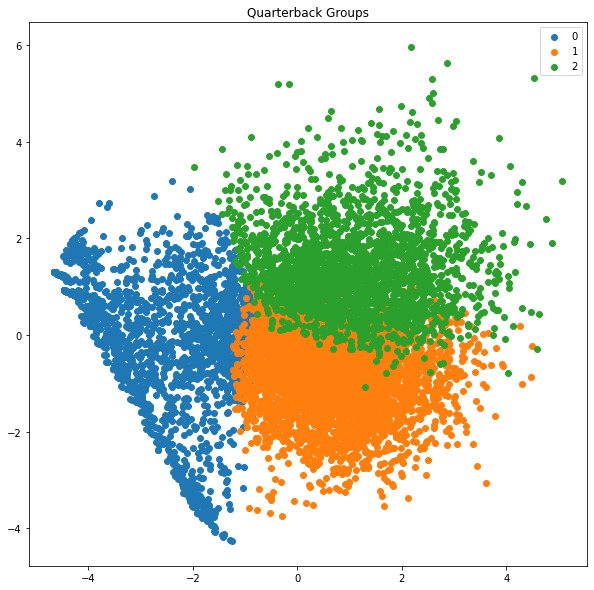

In [53]:
for i in unique_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label =i)
    
plt.legend()
plt.title("Quarterback Groups")
plt.show()

# Supervised Method

In [54]:
#Logistics prediction
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
df['td'].value_counts()

0    2736
1    2593
2    1694
3     762
4     238
5      52
6      13
7       3
Name: td, dtype: int64

<AxesSubplot:xlabel='td', ylabel='count'>

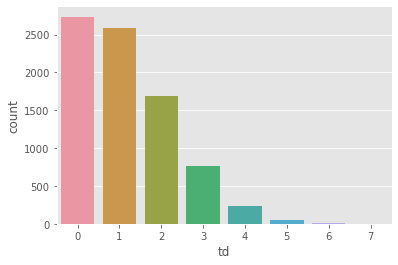

In [57]:
style.use('ggplot')
sns.countplot(df['td'])

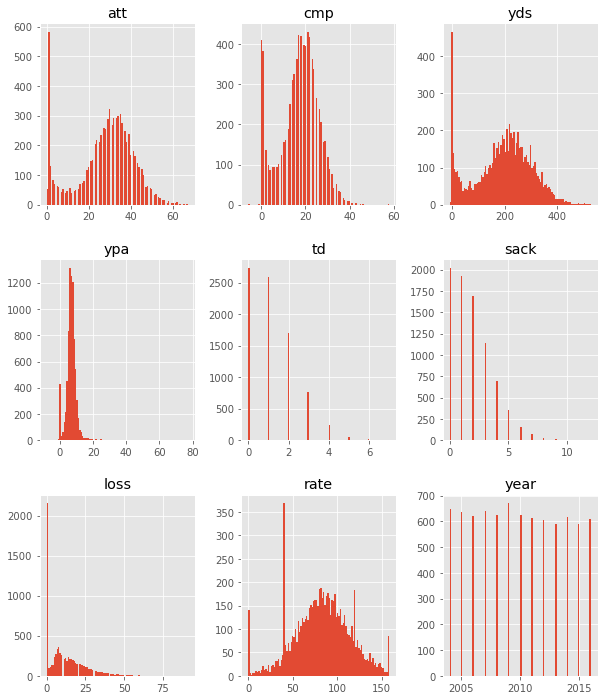

In [58]:
df.hist(bins = 100, figsize = (10,12))
plt.show()

In [59]:
df.corr()['td'].sort_values() #we can see that "rate" shows the highest correlation

loss    0.024504
sack    0.025932
year    0.094997
ypa     0.260206
att     0.433123
cmp     0.511635
yds     0.615327
rate    0.629062
td      1.000000
Name: td, dtype: float64

<AxesSubplot:xlabel='td', ylabel='rate'>

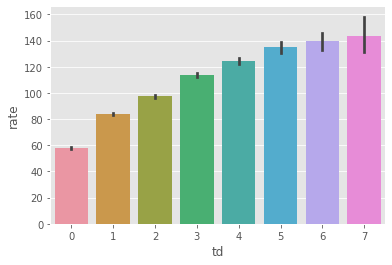

In [60]:
sns.barplot(df['td'], df['rate'])

In [61]:
df['td'] = df.td.apply(lambda x:1 if x>=4 else 0)

In [62]:
df['td'].value_counts()

0    7785
1     306
Name: td, dtype: int64

In [63]:
XX = df.drop('td', axis = 1)
yy = df['td']

In [64]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy, test_size=0.3, random_state = 42)

In [65]:
print("XX_train ",XX_train.shape)
print("yy_train ",yy_train.shape)
print("XX_test ",XX_test.shape )
print("yy_test ",yy_test.shape )

XX_train  (5663, 8)
yy_train  (5663,)
XX_test  (2428, 8)
yy_test  (2428,)


In [66]:
logreg = LogisticRegression()
logreg.fit(XX_train, yy_train)
logreg_pred = logreg.predict(XX_test)
logreg_acc = accuracy_score(logreg_pred, yy_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 96.75%


In [67]:
print(classification_report(yy_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2324
           1       0.75      0.37      0.49       104

    accuracy                           0.97      2428
   macro avg       0.86      0.68      0.74      2428
weighted avg       0.96      0.97      0.96      2428



TN:  [2311   13] [0]
FN:  [66 38] [0]
TP:  [66 38] [1]
FP:  [2311   13] [1]


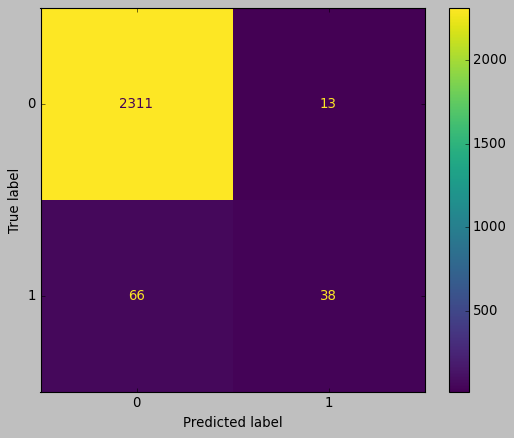

In [68]:
style.use('classic')
cm = confusion_matrix(yy_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
print("TN: ", cm[0],[0])
print("FN: ", cm[1],[0])
print("TP: ", cm[1],[1])
print("FP: ", cm[0],[1])